# Marketing Analysis: Exploratory Data Analysis

## Imports

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

## First impression

In [2]:
data = pd.read_csv("data/marketing_data.csv")

In [3]:
data.head(5)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_1,accepted_cmp_2,response,complain,country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2240 non-null   int64 
 1   year_birth             2240 non-null   int64 
 2   education              2240 non-null   object
 3   marital_status         2240 non-null   object
 4    income                2216 non-null   object
 5   kidhome                2240 non-null   int64 
 6   teenhome               2240 non-null   int64 
 7   dt_customer            2240 non-null   object
 8   recency                2240 non-null   int64 
 9   mnt_wines              2240 non-null   int64 
 10  mnt_fruits             2240 non-null   int64 
 11  mnt_meat_products      2240 non-null   int64 
 12  mnt_fish_products      2240 non-null   int64 
 13  mnt_sweet_products     2240 non-null   int64 
 14  mnt_gold_prods         2240 non-null   int64 
 15  num_deals_purchases  

## Preprocessing

### Removing Whitespace

The `Income` column, has unnecessary whitespace before the name. The first step entails removing all whitespace in the column names.

In [5]:
data.columns = data.columns.str.replace(' ', '')

### Reorder columns

The order of the columns is non-sequential. Campaign 3 comes before Campaign 1. Let's reorder the columns.

In [6]:
order = [
    'id',
    'year_birth',
    'education',
    'marital_status',
    'income',
    'kidhome',
    'teenhome',
    'dt_customer',
    'recency',
    'mnt_wines',
    'mnt_fruits',
    'mnt_meat_products',
    'mnt_fish_products',
    'mnt_sweet_products',
    'mnt_gold_prods',
    'num_deals_purchases',
    'num_web_purchases',
    'num_catalog_purchases',
    'num_store_purchases',
    'num_web_visits_month',
    'accepted_cmp_1',
    'accepted_cmp_2',
    'accepted_cmp_3',
    'accepted_cmp_4',
    'accepted_cmp_5',
    'response',
    'complain',
    'country'
]
data = data[order]

In [7]:
data.head(2)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp_1,accepted_cmp_2,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,response,complain,country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,1,0,0,0,1,0,CA


### Correct datatypes (dtypes) of columns

#### Dtypes Overview

In [8]:
data.dtypes

id                        int64
year_birth                int64
education                object
marital_status           object
income                   object
kidhome                   int64
teenhome                  int64
dt_customer              object
recency                   int64
mnt_wines                 int64
mnt_fruits                int64
mnt_meat_products         int64
mnt_fish_products         int64
mnt_sweet_products        int64
mnt_gold_prods            int64
num_deals_purchases       int64
num_web_purchases         int64
num_catalog_purchases     int64
num_store_purchases       int64
num_web_visits_month      int64
accepted_cmp_1            int64
accepted_cmp_2            int64
accepted_cmp_3            int64
accepted_cmp_4            int64
accepted_cmp_5            int64
response                  int64
complain                  int64
country                  object
dtype: object

#### Change to datetime in `dt_customer`

In [9]:
pd.to_datetime(data.dt_customer)

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: dt_customer, Length: 2240, dtype: datetime64[ns]

#### Change `income` from currency based string dtype to float.

In [11]:
data.income = pd.to_numeric(data.income.replace('[^0-9\.-]', '', regex=True))
data

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp_1,accepted_cmp_2,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,response,complain,country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,1,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,0,0,1,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND


### Remove NaN values

Let's check the dataset for any missing (NaN) values. As you can see below, theere are only some missing values in the `income` column.

<AxesSubplot:>

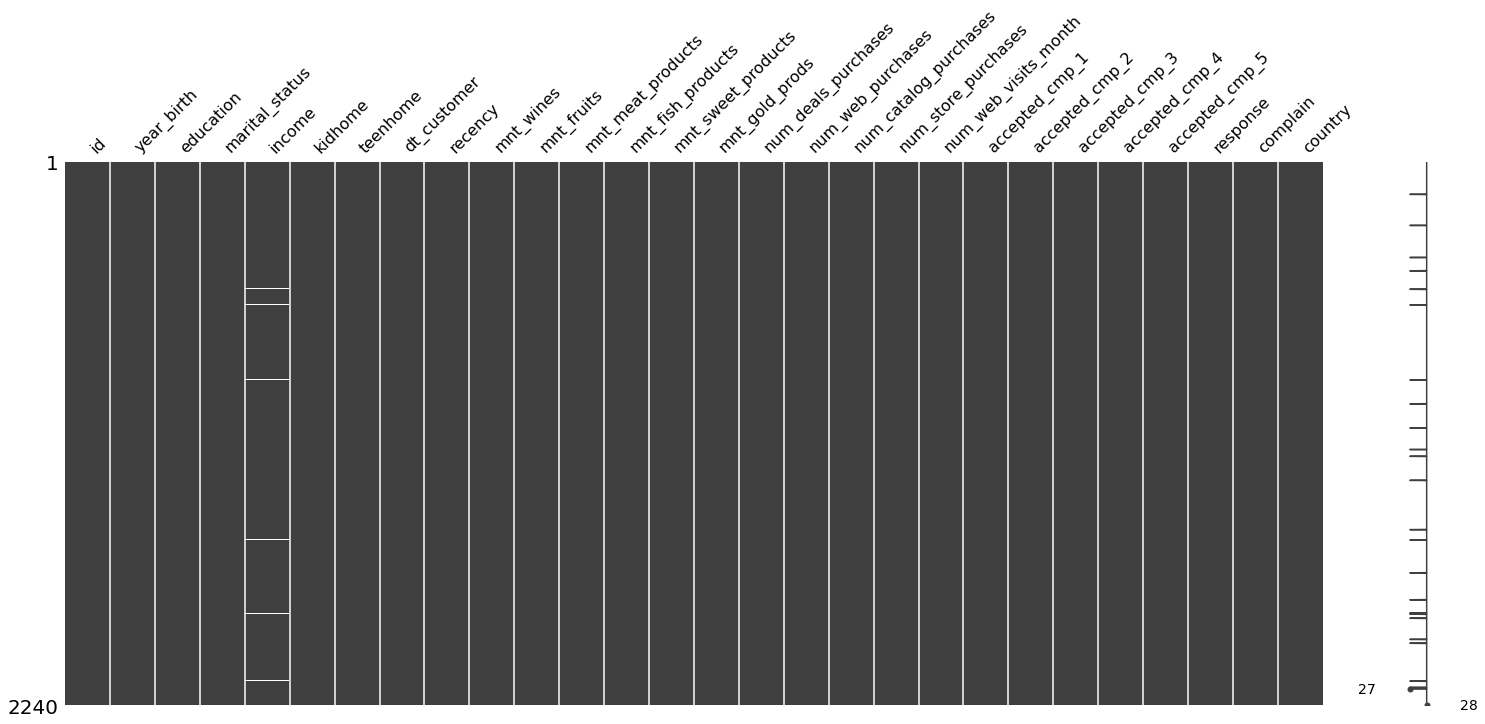

In [13]:
msno.matrix(data)

In [18]:
# Making sure that the 'income' column has no outliers and mean is an effective way to replace NaN values.
display(data.income.describe())

# Fill NaN with mean
data.income.fillna(data.income.mean(),inplace=True)

count      2240.000000
mean      52247.251354
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: income, dtype: float64

## Exploratory Data Analysis

In [24]:
# For convenience
df = data

In [25]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp_1,accepted_cmp_2,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,response,complain,country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,1,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,0,0,1,0,0,1,0,SP
